In [ ]:
!unzip '/content/drive/MyDrive/hw/arabic/ADAB DATABASE.zip'

Archive:  /content/drive/MyDrive/hw/arabic/ADAB DATABASE.zip
   creating: ADAB DATABASE/
  inflating: ADAB DATABASE/set_1.7z  
  inflating: ADAB DATABASE/set_2.7z  
  inflating: ADAB DATABASE/set_3.7z  


In [ ]:
%%capture
!7z x '/content/ADAB DATABASE/set_1.7z' 
!7z x '/content/ADAB DATABASE/set_2.7z' 
!7z x '/content/ADAB DATABASE/set_3.7z' 

In [ ]:
import os
im = len(os.listdir('/content/set_1/images'))
ink = len(os.listdir('/content/set_1/inkml'))
upx = len(os.listdir('/content/set_1/upx'))

In [ ]:
ink == upx

True

In [ ]:
file_1 = os.listdir('/content/set_1/inkml')[2]
f = open('/content/set_1/inkml/'+file_1)
x = f.read()
f.close()
# print(x)

In [ ]:
import xml.etree.ElementTree as ET
tree = ET.fromstring(x)
[tuple(map(int,(i.split()[0],i.split()[1]))) for i in tree[2].text.split(',')] # from 2 till end

In [ ]:
file_1 = os.listdir('/content/set_1/upx')[2]
f = open('/content/set_1/upx/'+file_1)
x = f.read()
f.close()
# print(x)

In [ ]:
import xml.etree.ElementTree as ET
tree = ET.fromstring(x)
tree[2][0][0][0].attrib['value']

'تاشين'

In [ ]:
import xml.etree.ElementTree as ET
data_strokes = []
for k in [1,2,3]:
  for i in os.listdir('/content/set_{}/inkml'.format(k)):
    f = open('/content/set_{}/inkml/'.format(k)+i)
    x = f.read()
    f.close()
    tree = ET.fromstring(x)
    temp = []
    for i in tree[2:]:
      temp.append([tuple(map(int,(i.split()[0],i.split()[1]))) for i in i.text.split(',')])
    # [tuple(map(int,(i.split()[0],i.split()[1]))) for i in tree[2].text.split(',')] # from 2 till end
    data_strokes.append(temp)

In [ ]:
import xml.etree.ElementTree as ET
data_keys = []
for k in [1,2,3]:
  for i in os.listdir('/content/set_{}/upx'.format(k)):
    f = open('/content/set_{}/upx/'.format(k)+i)
    x = f.read()
    f.close()
    tree = ET.fromstring(x)
    data_keys.append(tree[2][0][0][0].attrib['value'])

In [ ]:
print(len(data_keys))

15158


In [ ]:
!git clone https://github.com/X-rayLaser/pytorch-handwriting-synthesis-toolkit
!cd pytorch-handwriting-synthesis-toolkit && pip install -r requirements.txt

Cloning into 'pytorch-handwriting-synthesis-toolkit'...
remote: Enumerating objects: 1013, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 1013 (delta 158), reused 159 (delta 155), pack-reused 846
Receiving objects: 100% (1013/1013), 98.79 MiB | 24.51 MiB/s, done.
Resolving deltas: 100% (661/661), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 9.7 MB/s 
     |████████████████████████████████| 14.8 MB 52.3 MB/s 
     |████████████████████████████████| 804.1 MB 2.6 kB/s 
     |████████████████████████████████| 11.5 MB 29.9 MB/s 
     |████████████████████████████████| 17.4 MB 9.0 MB/s 
     |████████████████████████████████| 61 kB 10.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tor

In [ ]:
%cd /content/pytorch-handwriting-synthesis-toolkit
!python prepare_data.py ADAB 'ADAB'

/content/pytorch-handwriting-synthesis-toolkit
Calculating maximum length of training set sequences.
Checked 10000 sequences
Maximum length is 1081 points
Prepared 10000 examples
Computing mean: processed 10000 out of 10000 examples
Computed mean
Computing std: processed 10000 out of 10000 examples
Computed std
Prepared training data
Prepared 5000 examples
Computing mean: processed 5000 out of 5158 examples
Computed mean
Computing std: processed 5000 out of 5158 examples
Computed std
Prepared validation data
Building charset: processed 10000 of 10000 examples
Charset is saved to ADAB/charset.txt


In [ ]:
!cp -R /content/pytorch-handwriting-synthesis-toolkit/ADAB /content/drive/MyDrive/hw

In [ ]:
%cd /content/pytorch-handwriting-synthesis-toolkit
!python train.py /content/drive/MyDrive/hw/ADAB /content/drive/MyDrive/hw/ADAB_models

/content/pytorch-handwriting-synthesis-toolkit
Using device cuda:0
Could not find a model
Training handwriting synthesis model with options: training set size 10000, validation set size 5158, batch size 32, max sequence length 1081,sampling interval (in # iterations): 100
Could not find a model
Epoch    0 299/313 batches. Loss -142.41 nats. MSE 0.6722. SSE 2.0166./content/pytorch-handwriting-synthesis-toolkit/handwriting_synthesis/utils.py:236: RuntimeWarning: invalid value encountered in float_scalars
  colors = [str(t / temperatures.sum()) for t in temperatures]
Epoch    0 Loss -154.71 nats, Val. loss -411.55 nats.  MSE 0.6679. SSE 2.0037.  Val. MSE 0.5860. Val. SSE 1.7579.
Epoch    1 Loss -426.14 nats, Val. loss -436.71 nats.  MSE 0.5851. SSE 1.7552.  Val. MSE 0.5753. Val. SSE 1.7258.
Epoch    2 Loss -457.09 nats, Val. loss -459.99 nats.  MSE 0.5817. SSE 1.7450.  Val. MSE 0.5156. Val. SSE 1.5467.
Epoch    3 Loss -480.26 nats, Val. loss -486.53 nats.  MSE 0.4786. SSE 1.4357.  Val. MS

In [ ]:
%cd /content/pytorch-handwriting-synthesis-toolkit
!python synthesize.py /content/drive/MyDrive/hw/ADAB_models/Epoch_6 '' -b 0 --samples_dir=samples2 --trials=5

/content/pytorch-handwriting-synthesis-toolkit
Done 1 / 5
Done 2 / 5
Done 3 / 5
Done 4 / 5
Done 5 / 5


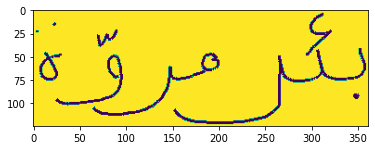

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread('/content/set_1/images/1231874526312.tif')
plt.imshow(img[:, :, 0])

In [ ]:
import time
s = "&#x628;&#x626;&#x631; &#x645;&#x631;&#x648;&#x651;&#x629;"
s = list(map(int,s.replace("&#x","").replace(" ","").split(';')[:-1]))
for i in s:
  print(chr(int('0x{}'.format(i), 16)), end = "")
  time.sleep(0.5)

بئرمروّة